In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import numpy as np
import pandas as pd
import collections
from datetime import datetime
from wordcloud import WordCloud

xname = os.path.join(os.path.dirname(os.getcwd()), 'xlsx_data', f"{'xlsx_#10_final'}.xlsx")
df = pd.read_excel(xname, index_col=0)

In [2]:
# document 길이 데이터
train_set = pd.Series(df['text'].tolist()).astype(str)
train_length = train_set.astype("str").apply(len)

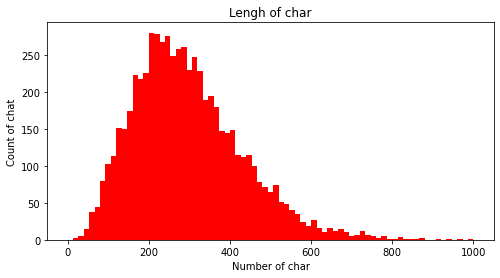

In [3]:
plt.figure(figsize=(8, 4))
plt.hist(train_length, bins=75, range=[0, 1000], facecolor='r')
plt.title('Lengh of char')
plt.xlabel('Number of char')
plt.ylabel('Count of chat')
plt.show()

In [4]:
# 데이터 길이
print(f"char 길이 최대:    {np.max(train_length):4d}")
print(f"char 길이 최소:    {np.min(train_length):4d}")
print(f"char 길이 평균:    {np.mean(train_length):7.2f}")
print(f"char 길이 표준편차: {np.std(train_length):7.2f}")

percentile25 = np.percentile(train_length, 25)
percentile50 = np.percentile(train_length, 50)
percentile75 = np.percentile(train_length, 75)
percentileIQR = percentile75 - percentile25
percentileMAX = percentile75 + percentileIQR * 1.5
print(f"char 25/100분위:  {percentile25:7.2f}")
print(f"char 50/100분위:  {percentile50:7.2f}")
print(f"char 75/100분위:  {percentile75:7.2f}")
print(f"char IQR:        {percentileIQR:7.2f}")
print(f"char MAX/100분위: {percentileMAX:7.2f}")

char 길이 최대:    1256
char 길이 최소:      21
char 길이 평균:     296.10
char 길이 표준편차:  133.67
char 25/100분위:   200.00
char 50/100분위:   277.00
char 75/100분위:   373.00
char IQR:         173.00
char MAX/100분위:  632.50


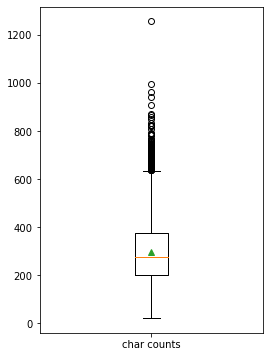

In [5]:
plt.figure(figsize=(4, 6))
plt.boxplot(train_length, labels=['char counts'], showmeans=True)
plt.show()

In [6]:
# word count
train_word_counts = train_set.astype(str).apply(lambda x:len(x.split(' ')))

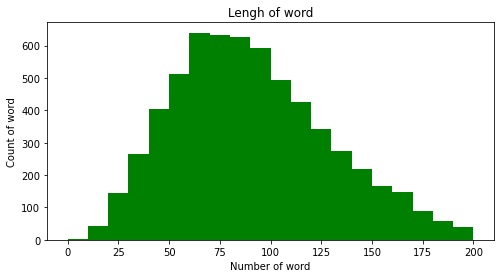

In [7]:
plt.figure(figsize=(8, 4))
plt.hist(train_word_counts, bins=20, range=[0, 200], facecolor='g')
plt.title('Lengh of word')
plt.xlabel('Number of word')
plt.ylabel('Count of word')
plt.show()

In [8]:
# 데이터 길이
print(f"word 길이 최대:    {np.max(train_word_counts):4d}")
print(f"word 길이 최소:    {np.min(train_word_counts):4d}")
print(f"word 길이 평균:    {np.mean(train_word_counts):7.2f}")
print(f"word 길이 표준편차: {np.std(train_word_counts):7.2f}")

percentile25 = np.percentile(train_word_counts, 25)
percentile50 = np.percentile(train_word_counts, 50)
percentile75 = np.percentile(train_word_counts, 75)
percentileIQR = percentile75 - percentile25
percentileMAX = percentile75 + percentileIQR * 1.5
print(f"word 25/100분위:  {percentile25:7.2f}")
print(f"word 50/100분위:  {percentile50:7.2f}")
print(f"word 75/100분위:  {percentile75:7.2f}")
print(f"word IQR:        {percentileIQR:7.2f}")
print(f"word MAX/100분위: {percentileMAX:7.2f}")

word 길이 최대:     393
word 길이 최소:       7
word 길이 평균:      92.47
word 길이 표준편차:   41.56
word 25/100분위:    63.00
word 50/100분위:    87.00
word 75/100분위:   116.00
word IQR:          53.00
word MAX/100분위:  195.50


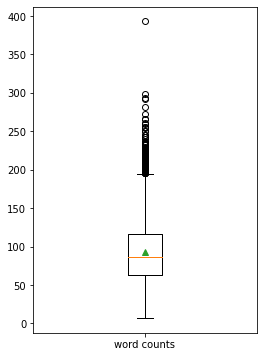

In [9]:
plt.figure(figsize=(4, 6))
plt.boxplot(train_word_counts, labels=['word counts'], showmeans=True)
plt.show()

In [10]:
train_chat = [chat for chat in train_set if type(chat) is str]

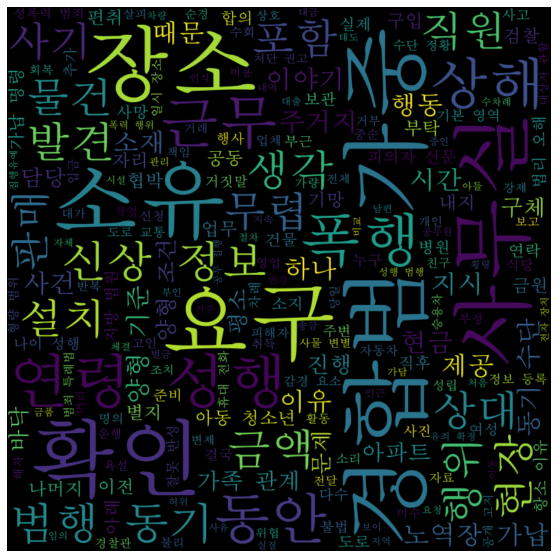

In [11]:
wordcloud = WordCloud(width=800, height=800, font_path='‪C:\Windows\Fonts\HMKMM.TTF').generate(" ".join(train_chat))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
pd.options.display.float_format = '{:.2f}'.format
df[['y_sentence', 'y_fine']].describe([.10, .20, .30, .40, .50, .60, .70, .80, .90, .95, .99])

,y_sentence,y_fine
count,4930.00,1907.00
mean,31.18,140402453.23
std,92.05,1919665521.37
min,0.00,348.00
10%,0.00,500000.00
20%,5.00,1000000.00
30%,6.00,2000000.00
40%,8.00,3000000.00
50%,12.00,3800000.00
60%,18.00,5000000.00


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


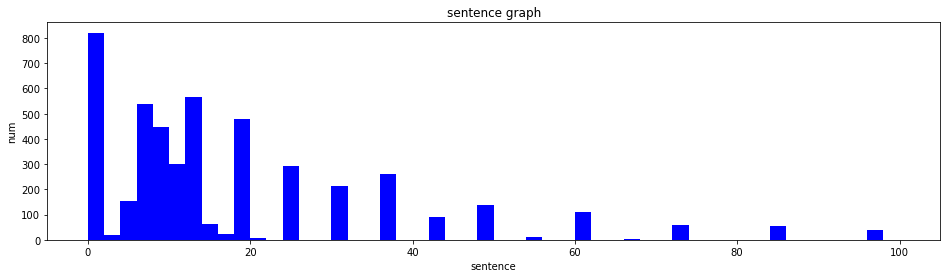

In [13]:
plt.figure(figsize=(16, 4))
plt.hist(df['y_sentence'], bins=50, range=[0, 100], facecolor='b', label='train')
plt.title('sentence graph')
plt.xlabel('sentence')
plt.ylabel('num')
plt.show()

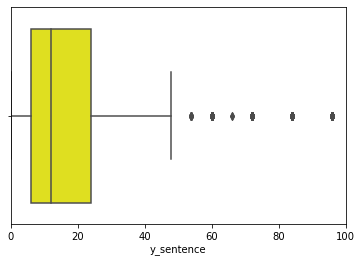

In [14]:
ax = sns.boxplot(x="y_sentence", data=df, color = 'yellow')
ax.set(xlim=(0, 100))
plt.show()

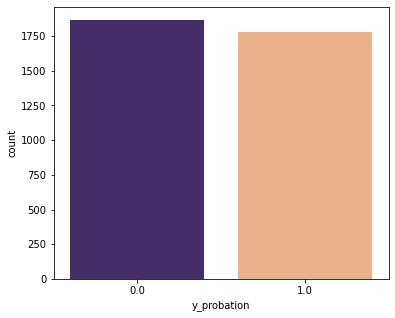

In [15]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 5)
subplt = sns.countplot(df['y_probation'], palette=['#432371',"#FAAE7B"])

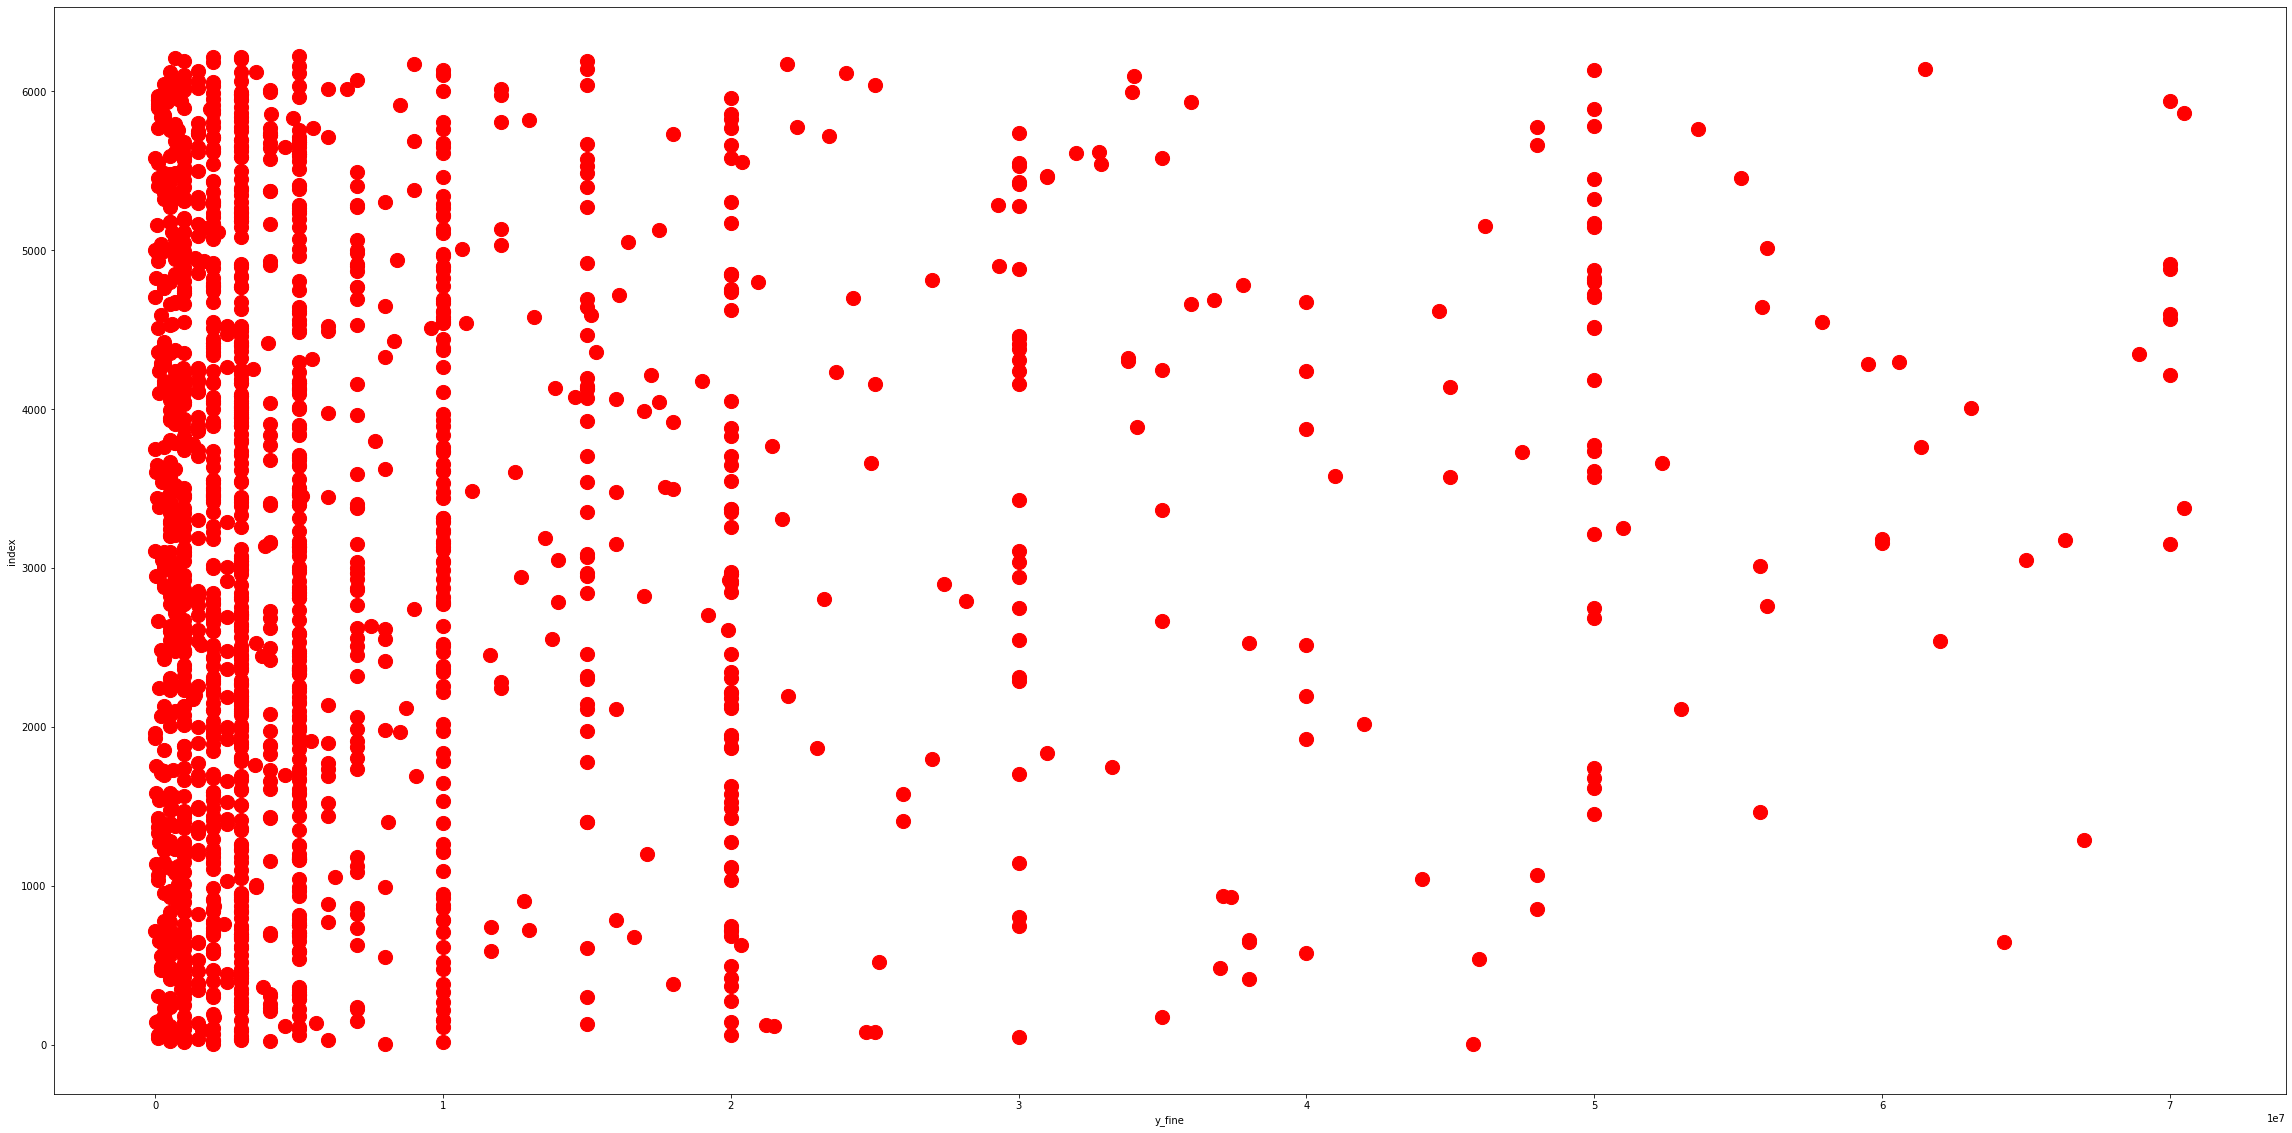

In [16]:
df_fine = df.dropna(subset = ['y_fine'])
df_fine = df_fine[df_fine['y_fine'] <= 70500000] #하위 90퍼센트
df_fine.reset_index().plot(kind='scatter', x='y_fine', y='index', color = 'red', figsize=(40,20), s=200)

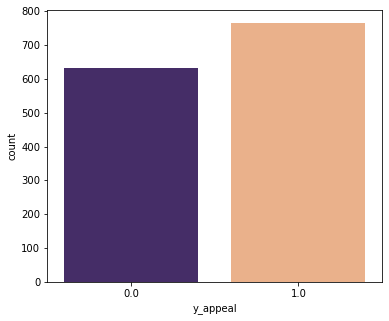

In [2]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 5)
subplt = sns.countplot(df['y_appeal'], palette=['#432371',"#FAAE7B"])